In [15]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 1000, 'display.max_colwidth', 1000, 'display.max_rows',1000)

# Read Data

In [16]:
def read_data_header(filename,read_lines=3):
    # Stocks Data is in UTC

    #generate header from the file
    with open(filename) as myfile:
        head1 =[]
        for i in range (0,read_lines):
            head1.append([str.split(next(myfile).strip(),sep=',') for x in range(0,1)])

    line1 = head1[0][0]
    line2 = head1[1][0]

    header = [i.replace('^','')+' '+j for i, j in zip(line1, line2)]
    header = [item.replace('var','variance') for item in header]
    header = [item.replace(' ','') for item in header]
    header = [item.replace('=','') for item in header]

    return header

In [17]:
filename='data/news_tweets_sentiments.csv'
header = read_data_header(filename,2)
df= pd.read_csv(filename, sep=',',skiprows=2,names=header)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1133 non-null   object 
 1   combinedcount         1133 non-null   int64  
 2   combinedmean          1133 non-null   float64
 3   combinedvariance      1128 non-null   float64
 4   negativecount         1133 non-null   int64  
 5   negativemean          1133 non-null   float64
 6   negativevariance      1128 non-null   float64
 7   neutralcount          1133 non-null   int64  
 8   neutralmean           1133 non-null   float64
 9   neutralvariance       1128 non-null   float64
 10  positivecount         1133 non-null   int64  
 11  positivemean          1133 non-null   float64
 12  positivevariance      1128 non-null   float64
 13  CLFDirectionmean      1100 non-null   float64
 14  GSPCDirectionmean     1051 non-null   float64
 15  GSPTSEDirectionmean  

In [18]:
def applysentiment(x):
    if x<0:
        return 0
    elif x>0:
        return 2
    else:
        return 1

df['sentimentmean1'] = df.combinedmean.apply(lambda x: applysentiment(x))

In [19]:
df[['sentimentmean','sentimentmean1']]

,sentimentmean,sentimentmean1
0,1.150000,2
1,1.272727,2
2,1.200000,0
3,1.714286,2
4,1.000000,0
...,...,...
1128,0.833333,0
1129,0.750000,0
1130,0.777778,0
1131,1.000000,2


In [20]:
TARGET = ["BTC-USDDirectionmean"]
#columns_predictors = ['combined mean']
#columns_predictors = ['negativemean','neutralmean','positivemean']
columns_predictors = ['sentimentmean1']
df = df[columns_predictors+TARGET].dropna(how='any')
X = df[columns_predictors]
y = df[TARGET]

<AxesSubplot:ylabel='Count'>

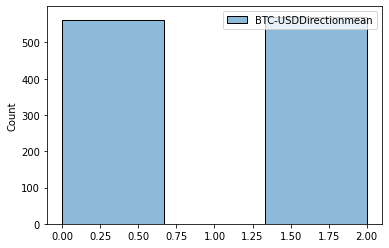

In [21]:
# check for balance data
# labels are balanced i.e equal split of inc and dec.
import seaborn as sns
sns.histplot(data=y, bins=3)

array([[<AxesSubplot:title={'center':'sentimentmean1'}>]], dtype=object)

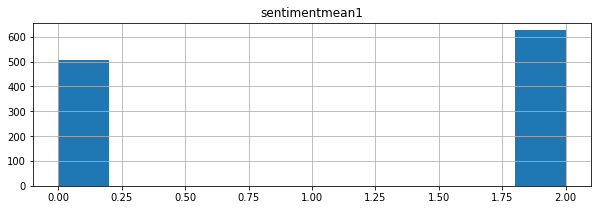

In [22]:
import matplotlib.pyplot as plt
X.hist(figsize=(10,3))

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10086, shuffle=False)
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (849, 1)
X_test.shape: (284, 1)
y_train.shape: (849, 1)
y_test.shape: (284, 1)


In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

def classification_metric(y_test,y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
    print("%.2f" % accuracy)
    # Confusion Matrix
    c_matrix= confusion_matrix(y_test,y_pred)
    print(c_matrix)
    return None

def model_evaluation(model,X_train,y_train,X_test,y_test):
    model = model.fit(X_train,y_train)
    # training accuracy
    classification_metric(y_train,model.predict(X_train))

    #testing accuracy
    classification_metric(y_test,model.predict(X_test))
    return None

# SVM Model (Linear Model)

In [25]:
## Linear Features
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

svm_clf = SVC(kernel="linear", C=100)
model_evaluation(svm_clf, X_train,y_train, X_test, y_test)

0.52
[[251 178]
 [229 191]]
0.50
[[68 65]
 [77 74]]


/Users/sarthakkaushik/Projects/uot/MachineLearning/env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
## Polynomial Features Degree 2
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2)),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])
model_evaluation(polynomial_svm_clf, X_train,y_train, X_test, y_test)

0.52
[[251 178]
 [229 191]]
0.50
[[68 65]
 [77 74]]


/Users/sarthakkaushik/Projects/uot/MachineLearning/env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])
model_evaluation(polynomial_svm_clf, X_train,y_train, X_test, y_test)

0.52
[[251 178]
 [229 191]]
0.50
[[68 65]
 [77 74]]


/Users/sarthakkaushik/Projects/uot/MachineLearning/env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# SVM Model (Non_linear Model)

In [30]:
poly_kernel_svm_clf = Pipeline([
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=0.1, C=10))
    ])
model_evaluation(poly_kernel_svm_clf, X_train,y_train, X_test, y_test)


0.52
[[251 178]
 [229 191]]
0.50
[[68 65]
 [77 74]]


/Users/sarthakkaushik/Projects/uot/MachineLearning/env/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
